In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# LOAD DATASET

In [2]:
df = pd.read_csv('milknew.csv')

# Basic EDA

In [3]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
df.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [5]:
df.shape

(1059, 8)

In [6]:
df.info

<bound method DataFrame.info of        pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0     6.6          35      1     0     1          0     254    high
1     6.6          36      0     1     0          1     253    high
2     8.5          70      1     1     1          1     246     low
3     9.5          34      1     1     0          1     255     low
4     6.6          37      0     0     0          0     255  medium
...   ...         ...    ...   ...   ...        ...     ...     ...
1054  6.7          45      1     1     0          0     247  medium
1055  6.7          38      1     0     1          0     255    high
1056  3.0          40      1     1     1          1     255     low
1057  6.8          43      1     0     1          0     250    high
1058  8.6          55      0     1     1          1     255     low

[1059 rows x 8 columns]>

In [7]:
df.describe

<bound method NDFrame.describe of        pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0     6.6          35      1     0     1          0     254    high
1     6.6          36      0     1     0          1     253    high
2     8.5          70      1     1     1          1     246     low
3     9.5          34      1     1     0          1     255     low
4     6.6          37      0     0     0          0     255  medium
...   ...         ...    ...   ...   ...        ...     ...     ...
1054  6.7          45      1     1     0          0     247  medium
1055  6.7          38      1     0     1          0     255    high
1056  3.0          40      1     1     1          1     255     low
1057  6.8          43      1     0     1          0     250    high
1058  8.6          55      0     1     1          1     255     low

[1059 rows x 8 columns]>

# Data Cleaning

In [8]:
df.duplicated().sum()

976

In [9]:
df.drop_duplicates()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
930,6.6,38,0,1,1,1,255,high
942,6.6,45,1,0,0,1,255,medium
957,6.8,41,1,1,1,0,255,high
985,6.5,45,1,0,0,0,246,medium


In [10]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [11]:
df.nunique()

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

# Value counts of Different Colums

In [12]:
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [13]:
df['pH'].value_counts()

6.8    249
6.5    189
6.6    159
6.7     82
3.0     70
9.0     61
8.6     40
7.4     39
4.5     37
9.5     24
8.1     24
5.5     23
8.5     22
4.7     20
5.6     19
6.4      1
Name: pH, dtype: int64

In [14]:
df['Taste'].value_counts()

1    579
0    480
Name: Taste, dtype: int64

In [15]:
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [16]:
df['Temprature'].value_counts()

45    219
38    179
40    132
37     83
43     77
36     66
50     58
55     48
34     40
41     30
66     24
35     23
70     22
65     22
60     18
90     17
42      1
Name: Temprature, dtype: int64

In [17]:
df.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


# Data Visualization

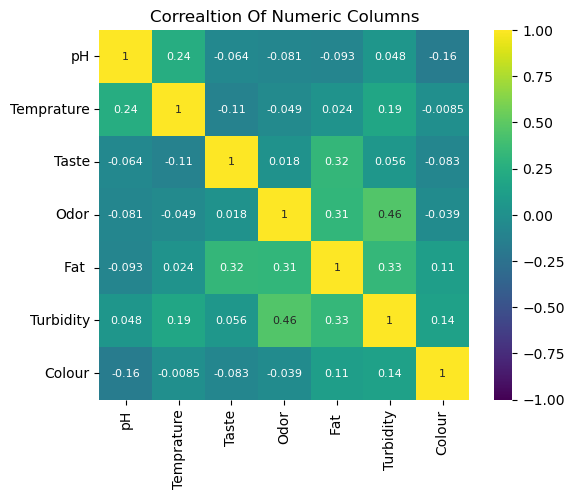

In [18]:
heatmap=sns.heatmap(
    df.corr(),
    annot=True, 
    cmap='viridis', 
    vmax=1.0,
    vmin=-1.0,
    annot_kws={"size":8},
    square=True
)
heatmap.set_title('Correaltion Of Numeric Columns')
plt.show()

# Grade Distribution

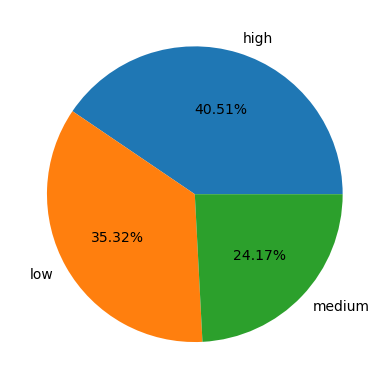

In [19]:
plt.pie(df['Grade'].value_counts(),autopct='%.2f%%',labels=np.unique(df['Grade']))
plt.show()

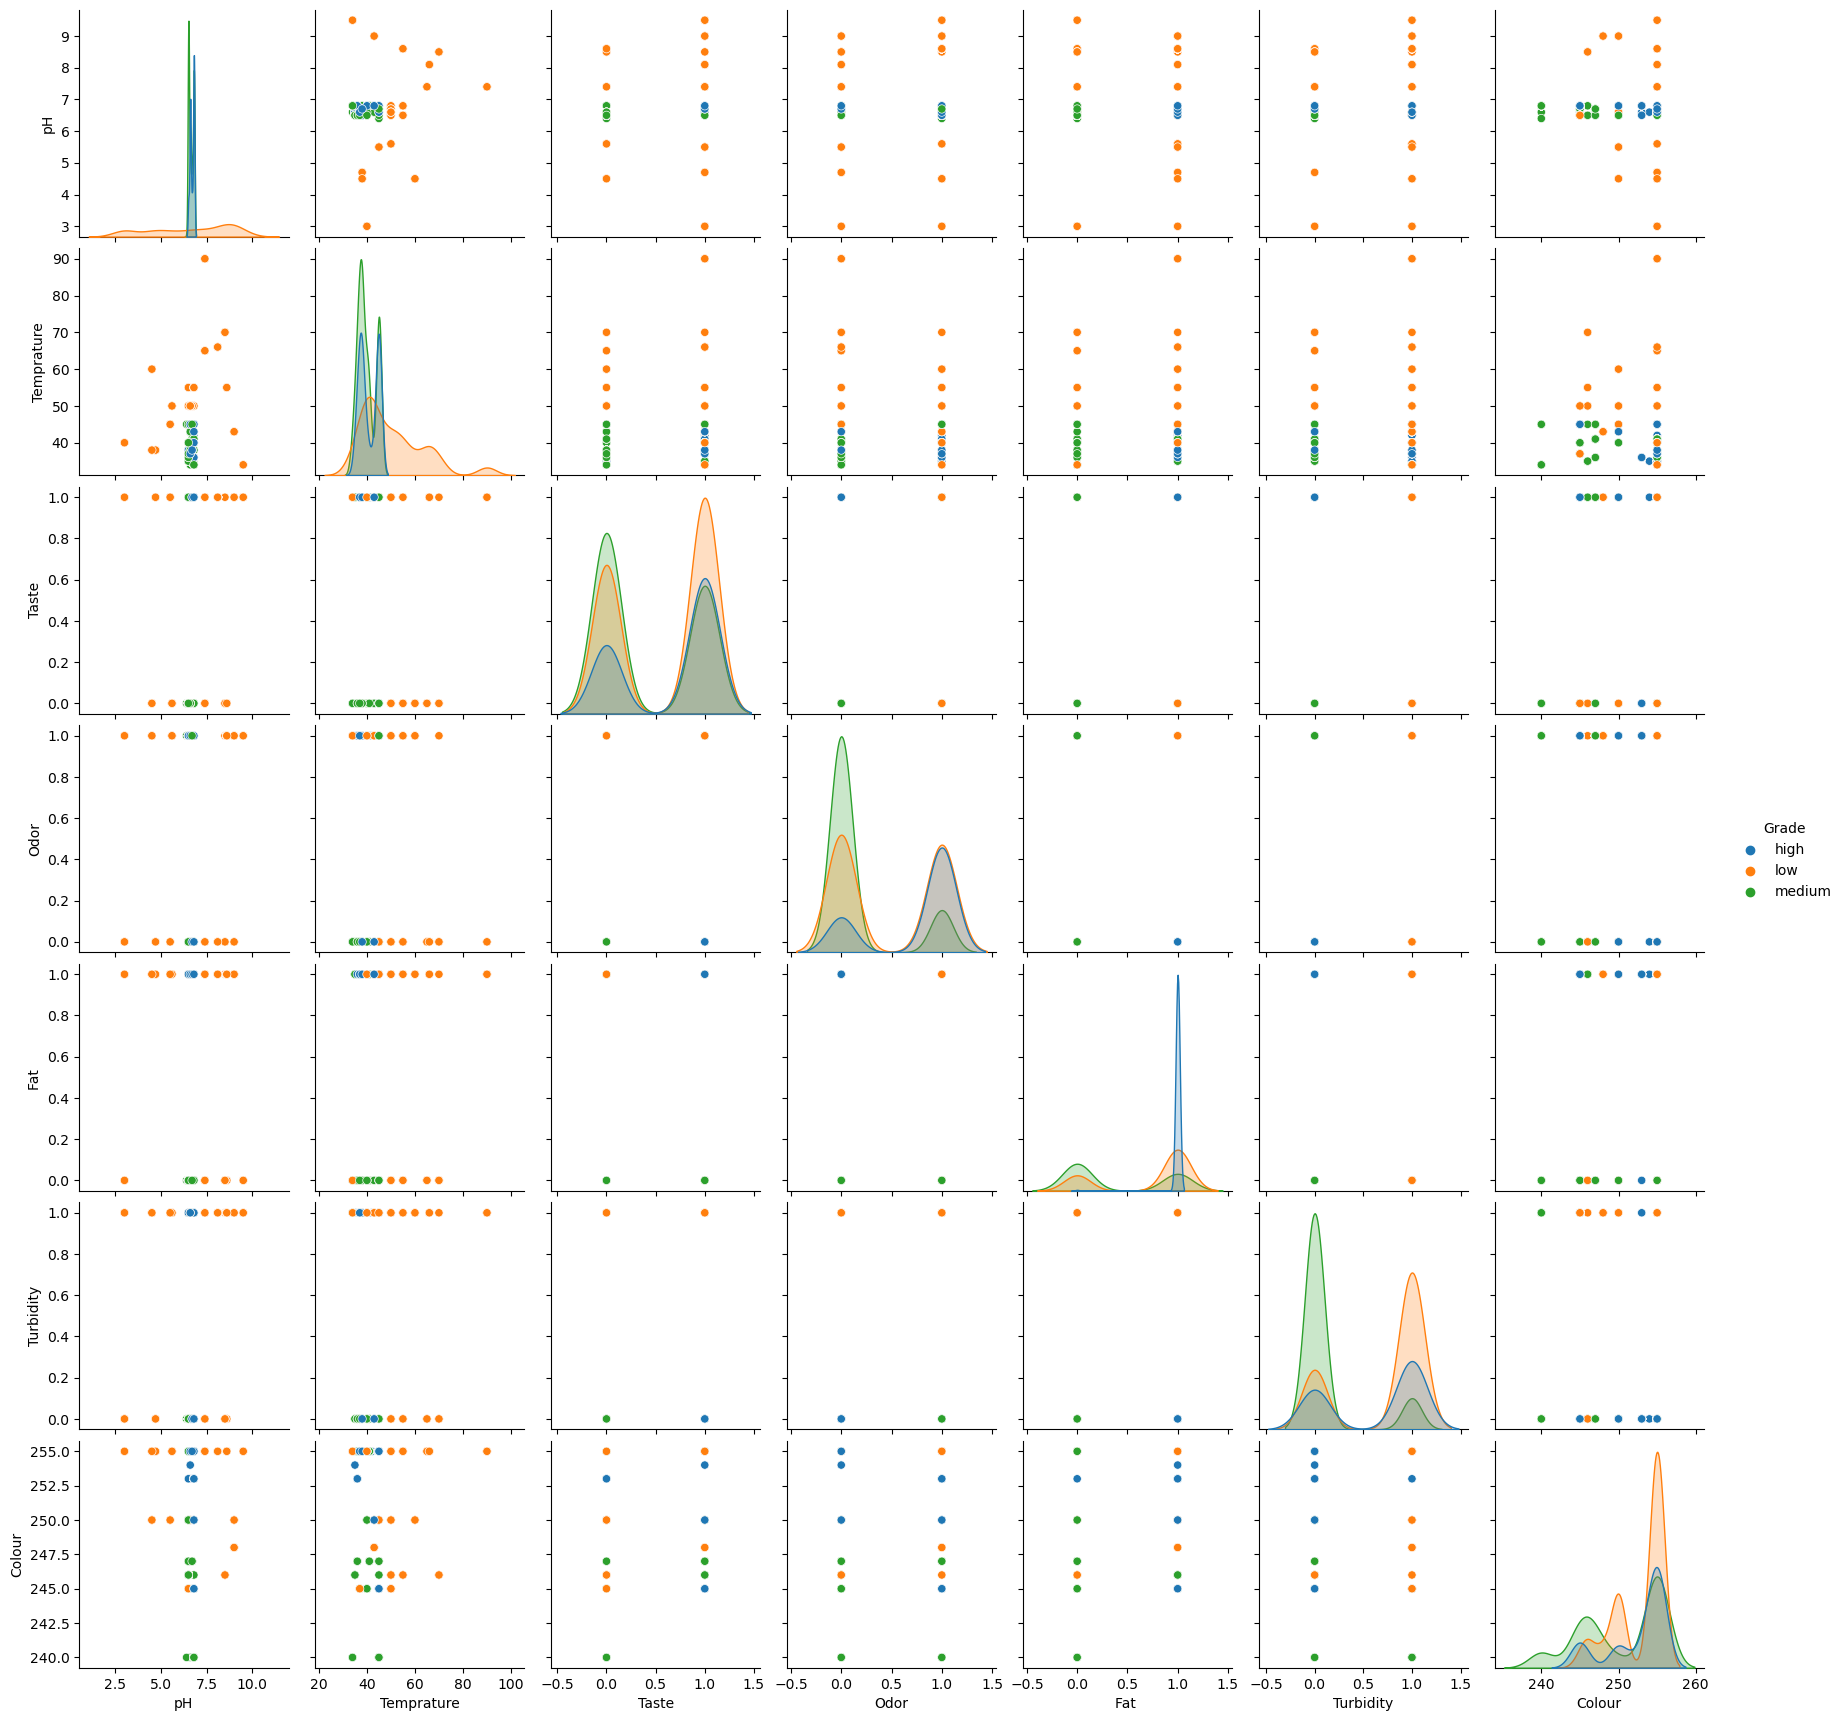

In [20]:
sns.pairplot(df,hue='Grade')

<Axes: xlabel='Grade', ylabel='Colour'>

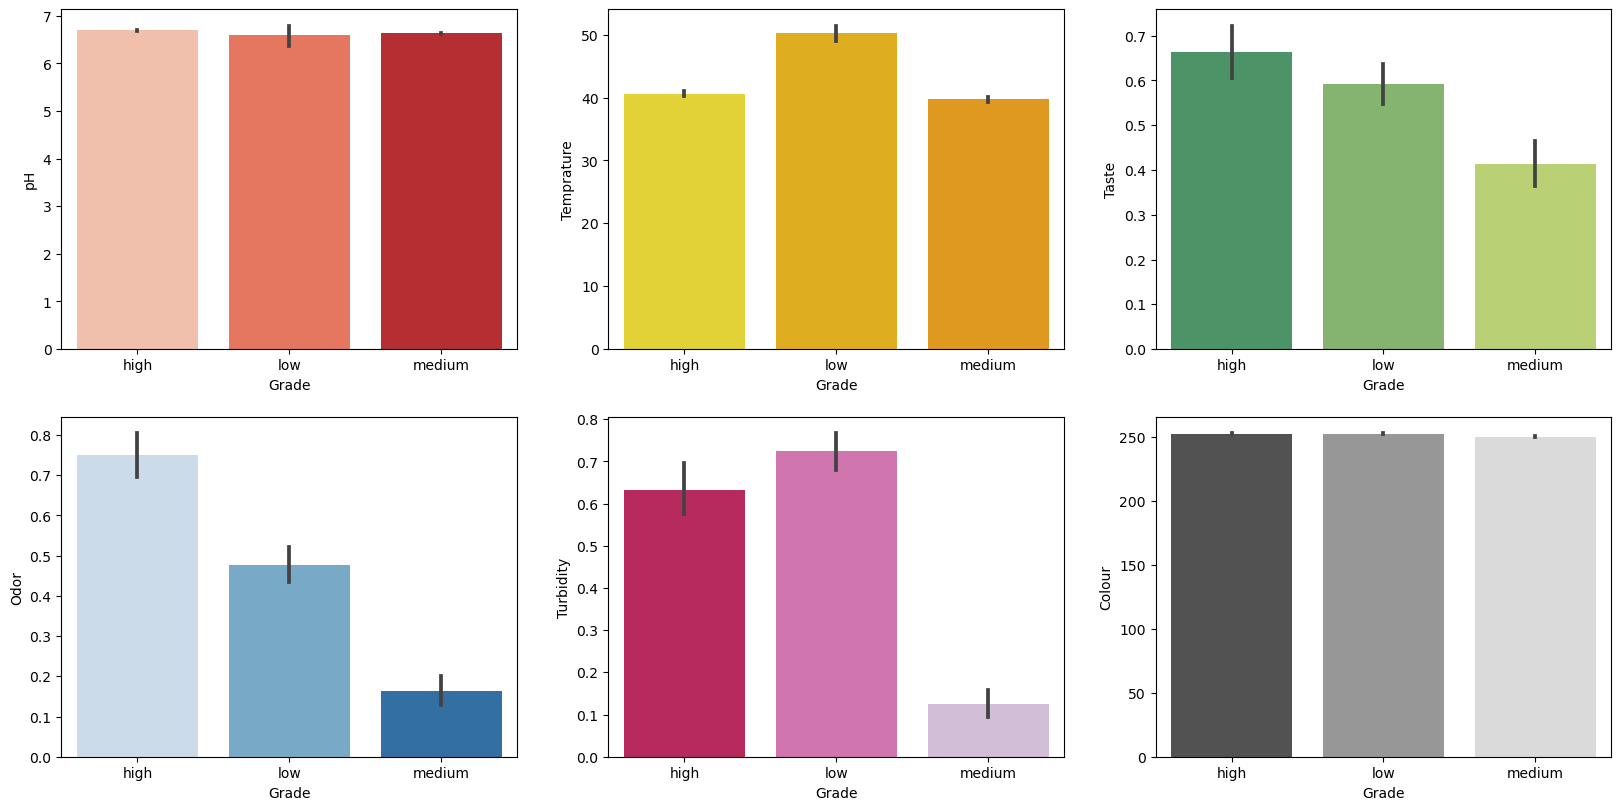

In [21]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.barplot(x = 'Grade', y = 'pH',data =df, palette = "Reds")

plt.subplot(3,3,2)
sns.barplot(x = 'Grade', y = 'Temprature',data =df, palette = "Wistia")

plt.subplot(3,3,3)
sns.barplot(x = 'Grade', y = 'Taste',data =df, palette = "summer")

plt.subplot(3,3,4)
sns.barplot(x = 'Grade', y = 'Odor',data =df, palette = "Blues")

plt.subplot(3,3,5)
sns.barplot(x = 'Grade', y = 'Turbidity',data =df, palette = "PuRd_r")

plt.subplot(3,3,6)
sns.barplot(x = 'Grade', y = 'Colour',data =df, palette = "Greys_r")

# Odor v/s Grade using Boxplot

Text(0.5, 1.0, 'Odor v/s Grade')

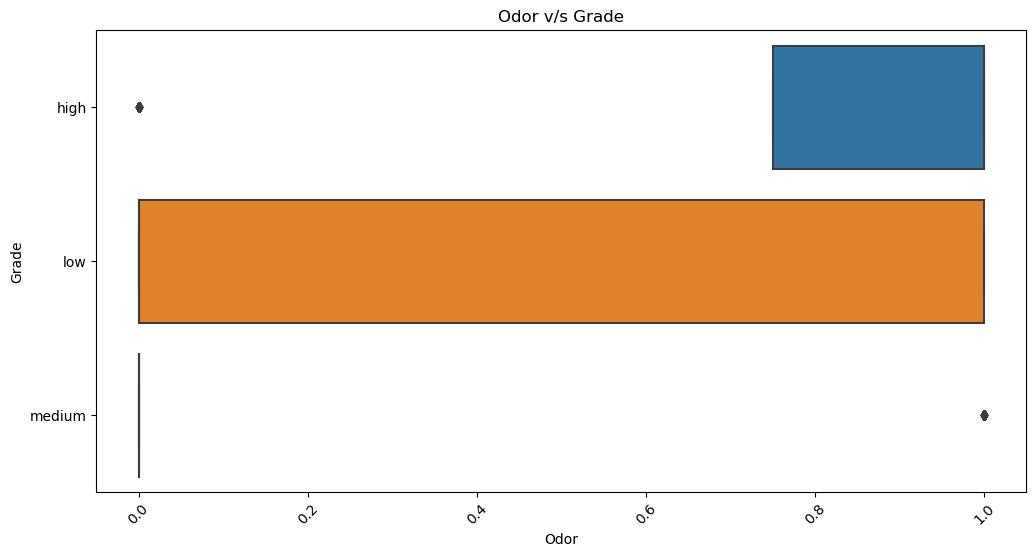

In [22]:
plt.figure(figsize =(12,6))
ax = sns.boxplot(y='Grade', x = 'Odor', data=df)
plt.setp(ax.artists, alpha = .5 , linewidth = 2 , edgecolor="k")
plt.xticks(rotation = 45)
plt.title('Odor v/s Grade')

# Temprature v/s Grade using Lineplot

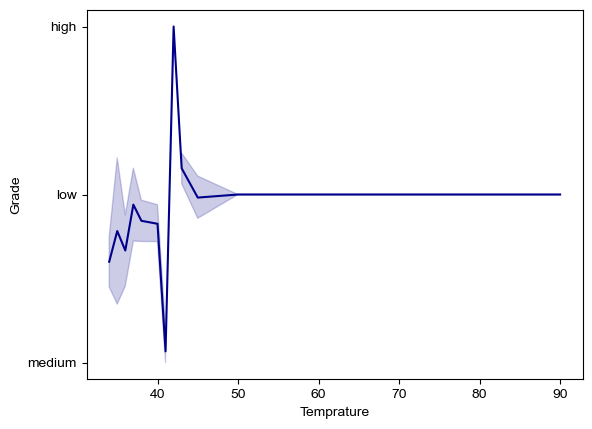

In [23]:
sns.lineplot(x=df['Temprature'], y=df['Grade'], color='darkblue')
sns.set_style("darkgrid")
plt.show()

# pH v/s Grade using Barplot

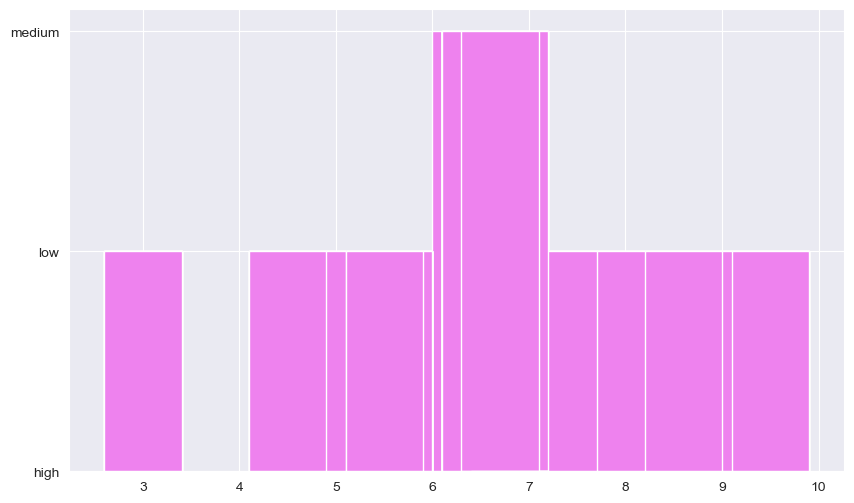

In [24]:
plt.figure(figsize = (10,6))

plt.bar(df['pH'], df['Grade'], color='violet')

plt.show()

# Taste v/s Grade using Scatterplot

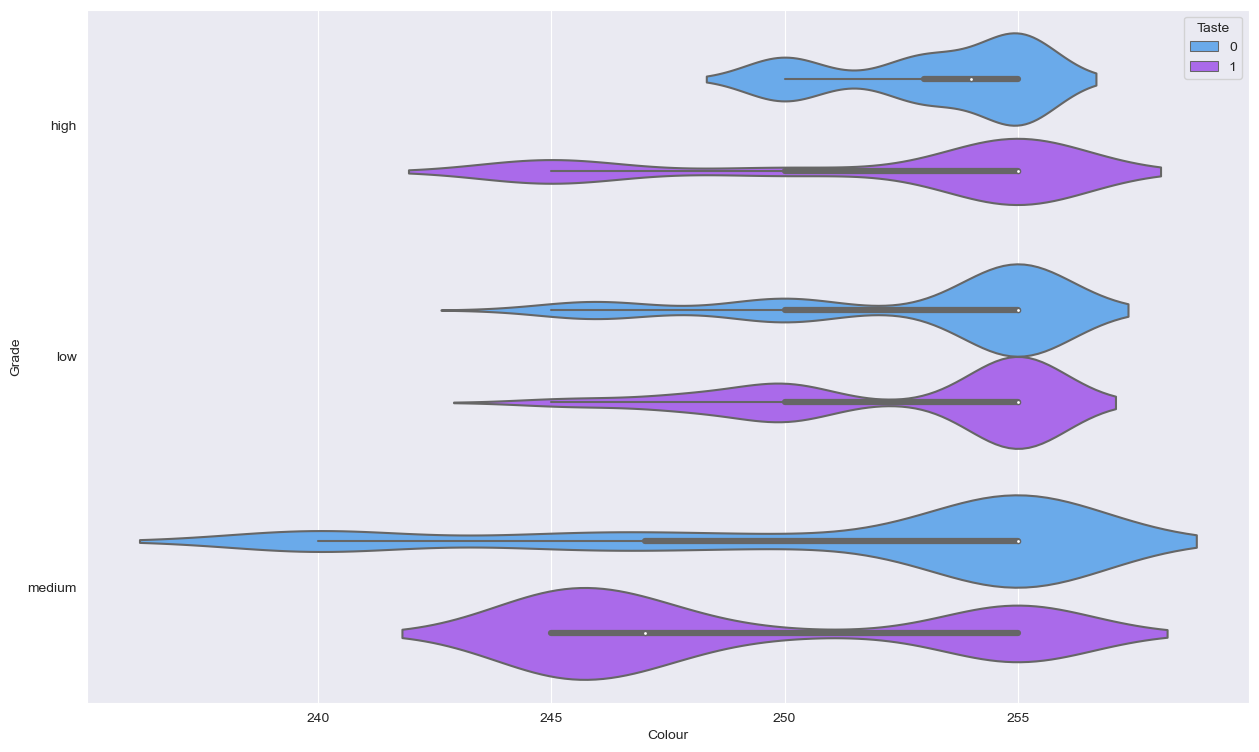

In [25]:
plt.figure(figsize = (15,9))
sns.violinplot(x=df['Colour'],y=df['Grade'],hue = df['Taste'],palette='cool')
plt.show()

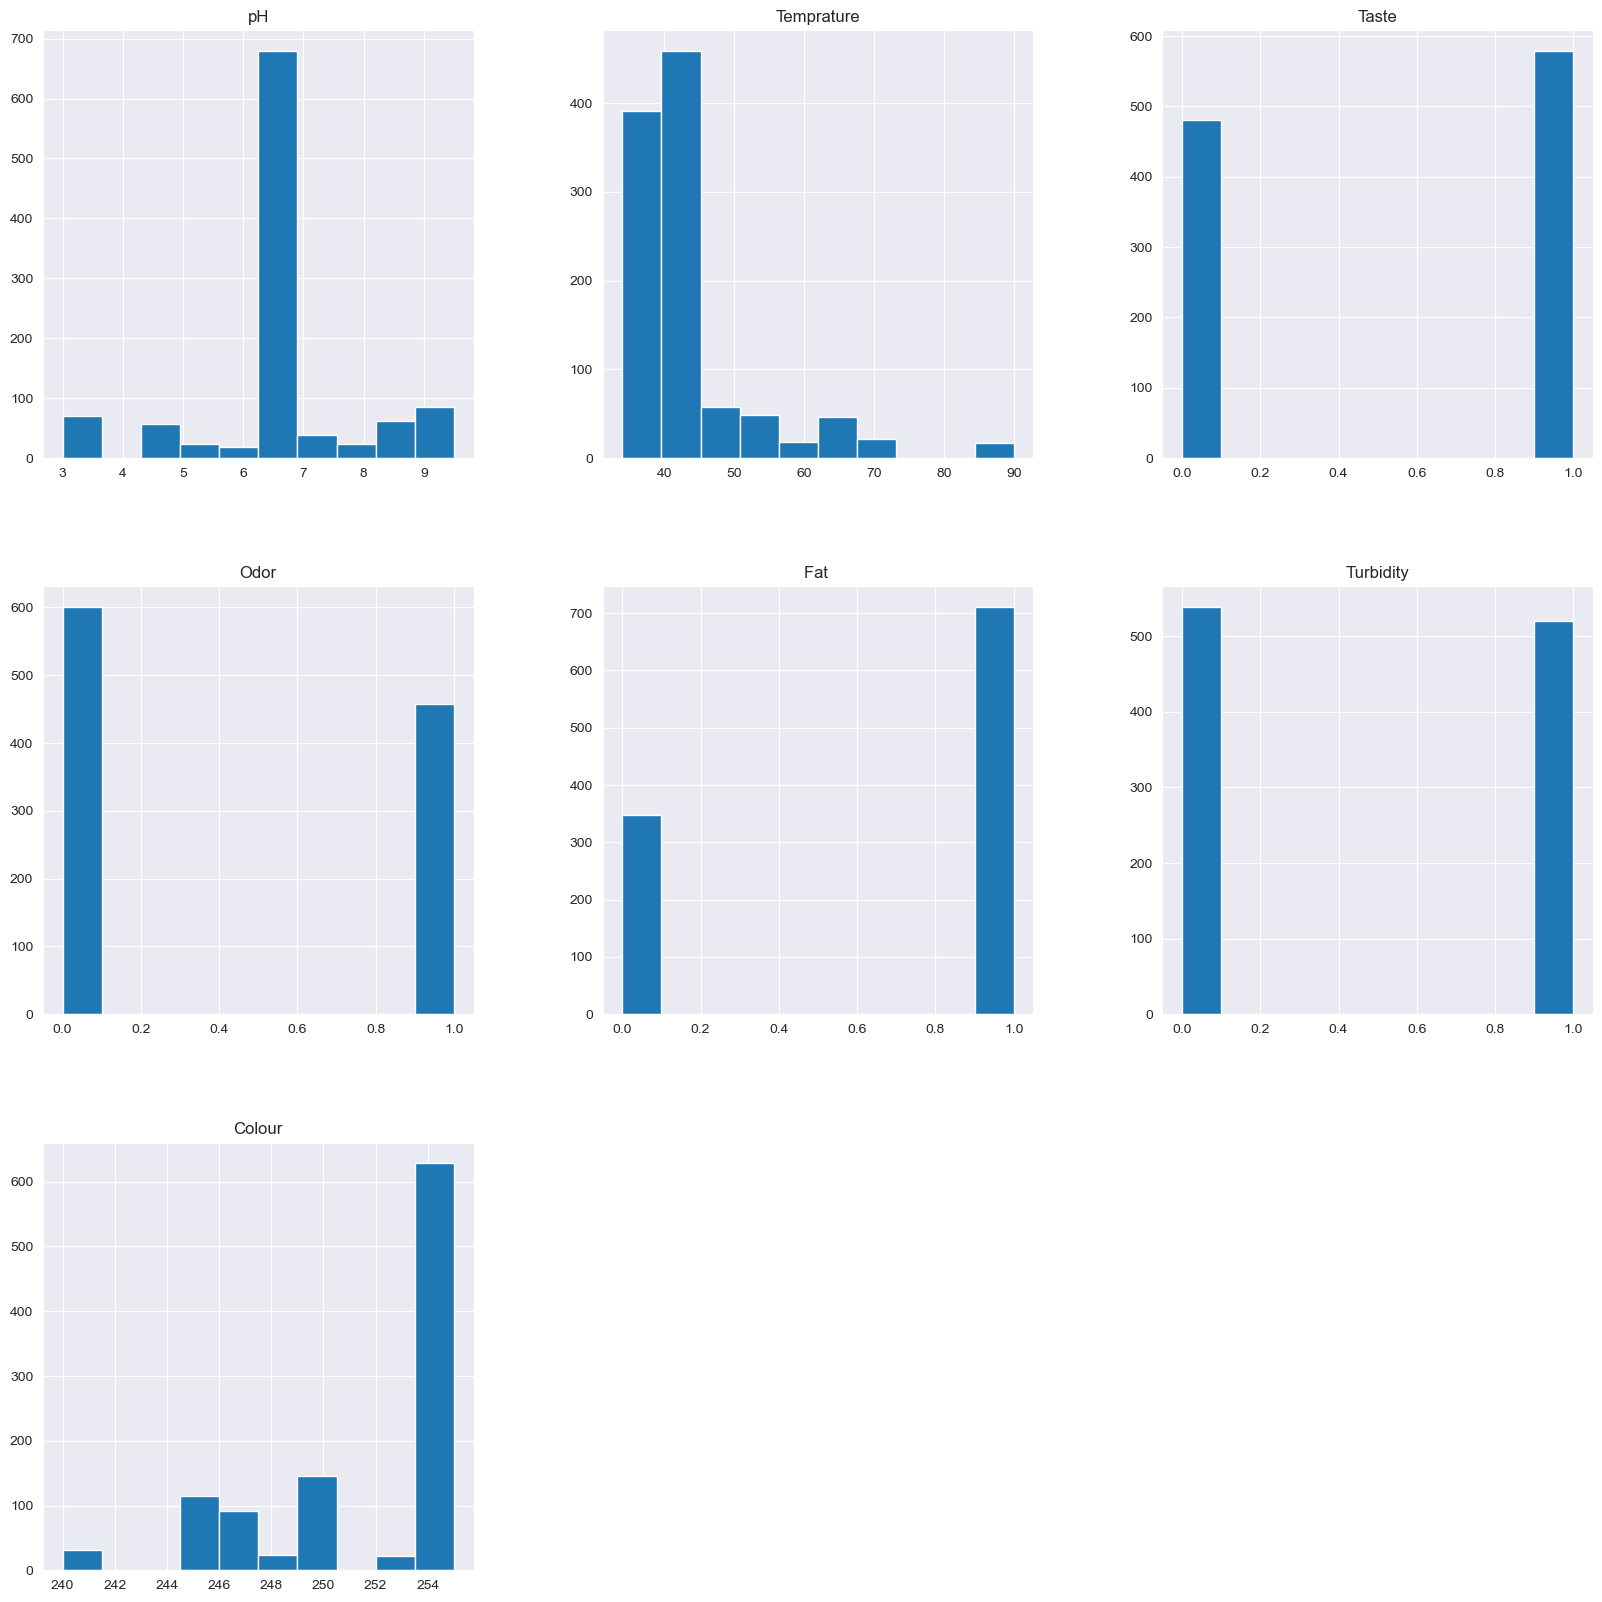

In [26]:
df.hist(figsize=(20,20))
plt.show()

<Axes: xlabel='Grade', ylabel='Colour'>

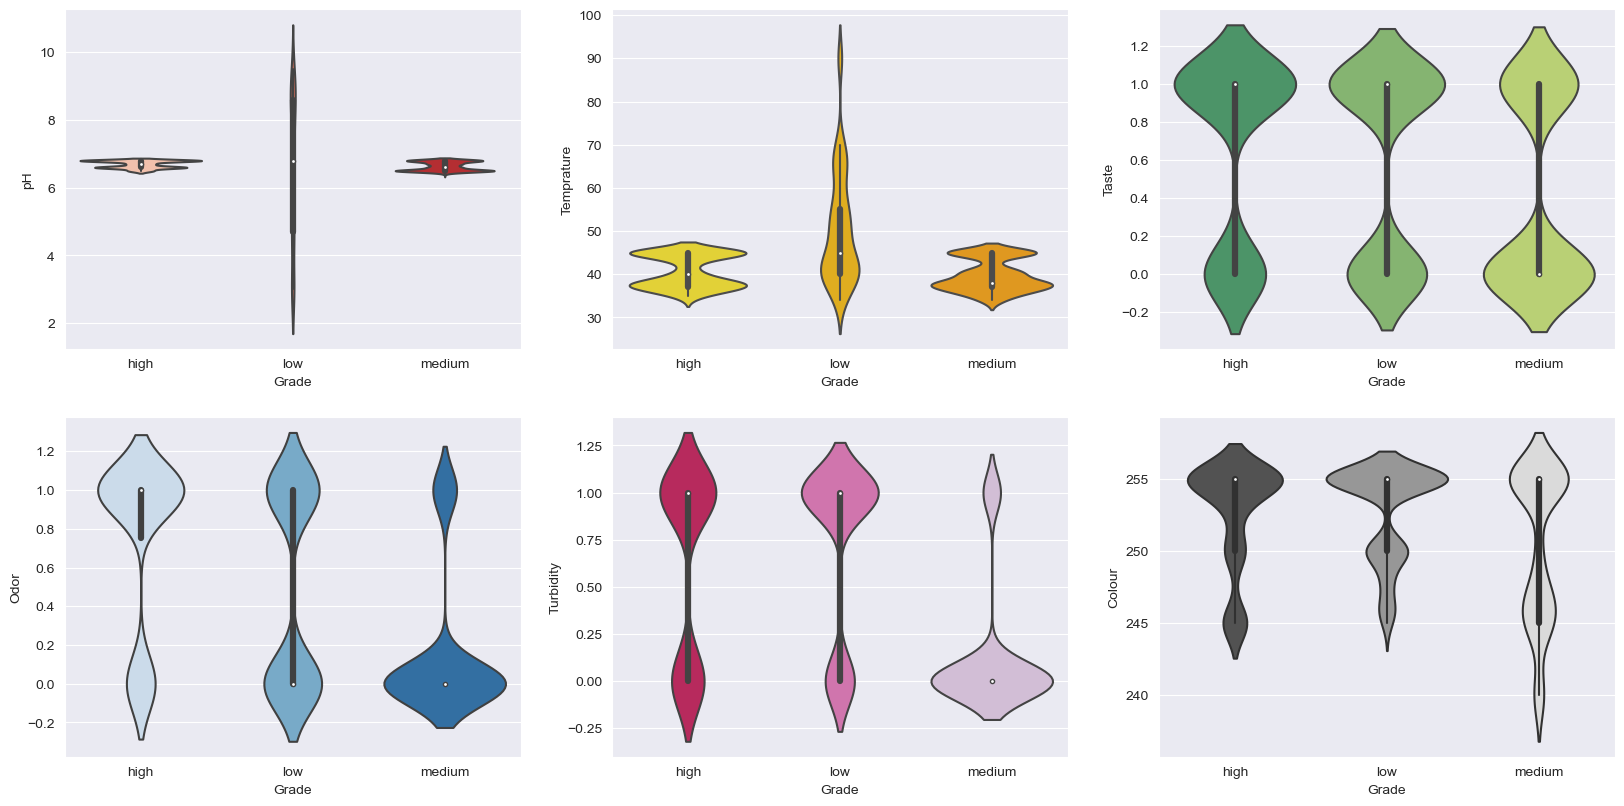

In [27]:
plt.figure(figsize = (20,15))

plt.subplot(3,3,1)
sns.violinplot(x = 'Grade', y = 'pH',data =df, palette = "Reds")

plt.subplot(3,3,2)
sns.violinplot(x = 'Grade', y = 'Temprature',data =df, palette = "Wistia")

plt.subplot(3,3,3)
sns.violinplot(x = 'Grade', y = 'Taste',data =df, palette = "summer")

plt.subplot(3,3,4)
sns.violinplot(x = 'Grade', y = 'Odor',data =df, palette = "Blues")

plt.subplot(3,3,5)
sns.violinplot(x = 'Grade', y = 'Turbidity',data =df, palette = "PuRd_r")

plt.subplot(3,3,6)
sns.violinplot(x = 'Grade', y = 'Colour',data =df, palette = "Greys_r")

# Data Preparation

In [28]:
x=df.drop('Grade',axis=1)

In [29]:
y = df.Grade

In [30]:
x

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


In [31]:
y

0         high
1         high
2          low
3          low
4       medium
         ...  
1054    medium
1055      high
1056       low
1057      high
1058       low
Name: Grade, Length: 1059, dtype: object

# Model Building

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [33]:
X_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
5,6.6,37,1,1,1,1,255
310,6.6,37,1,1,1,1,255
557,4.7,38,1,0,1,0,255
104,5.6,50,0,1,1,1,255
97,6.5,37,0,0,0,0,255


In [34]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [35]:
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [36]:
X_train_std

array([[-0.01298657, -0.73413845,  0.93338744, ...,  0.66666667,
         0.98792712,  0.72665791],
       [-0.01298657, -0.73413845,  0.93338744, ...,  0.66666667,
         0.98792712,  0.72665791],
       [-1.35738312, -0.63281668,  0.93338744, ...,  0.66666667,
        -1.01222041,  0.72665791],
       ...,
       [-0.08374428, -0.83546022, -1.07136646, ...,  0.66666667,
        -1.01222041,  0.72665791],
       [-0.01298657,  0.58304458, -1.07136646, ..., -1.5       ,
         0.98792712, -0.47043749],
       [ 0.12852886,  0.07643572,  0.93338744, ...,  0.66666667,
        -1.01222041, -1.66753288]])

In [37]:
X_train

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
5,6.6,37,1,1,1,1,255
310,6.6,37,1,1,1,1,255
557,4.7,38,1,0,1,0,255
104,5.6,50,0,1,1,1,255
97,6.5,37,0,0,0,0,255
...,...,...,...,...,...,...,...
330,9.0,43,1,0,1,1,250
466,6.7,45,1,1,1,0,245
121,6.5,36,0,0,1,0,255
1044,6.6,50,0,0,0,1,250


In [38]:
y_train.head()

5        high
310      high
557       low
104       low
97     medium
Name: Grade, dtype: object

In [39]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [41]:
lr.fit(X_train, y_train)

LogisticRegression()

In [42]:
print('Training accuracy score',lr.score(X_train, y_train))
print('Testing accuracy score',lr.score(X_test, y_test))


Training accuracy score 0.7206477732793523
Testing accuracy score 0.6981132075471698


# Confusion Matrix 

In [43]:
from sklearn import metrics

In [44]:
confusion_matrix = metrics.confusion_matrix

In [45]:
y_pred= lr.predict(X_test)

In [46]:
cf_matrix = confusion_matrix(y_test, y_pred)

In [47]:
cf_matrix

array([[ 28,  26,  22],
       [ 17,  84,  14],
       [  5,  12, 110]], dtype=int64)

<Axes: >

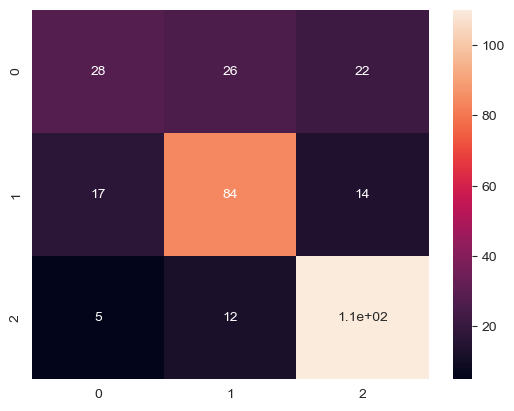

In [48]:
sns.heatmap(cf_matrix,annot=True)

# Classification Report


In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.56      0.37      0.44        76
         low       0.69      0.73      0.71       115
      medium       0.75      0.87      0.81       127

    accuracy                           0.70       318
   macro avg       0.67      0.65      0.65       318
weighted avg       0.68      0.70      0.68       318



In [51]:
print(y_pred)

['low' 'low' 'low' 'low' 'medium' 'low' 'medium' 'low' 'high' 'medium'
 'low' 'medium' 'medium' 'medium' 'low' 'medium' 'low' 'medium' 'medium'
 'medium' 'high' 'medium' 'medium' 'medium' 'medium' 'medium' 'low' 'high'
 'medium' 'low' 'medium' 'medium' 'high' 'medium' 'low' 'medium' 'medium'
 'low' 'medium' 'medium' 'low' 'low' 'high' 'medium' 'high' 'high'
 'medium' 'medium' 'medium' 'medium' 'medium' 'low' 'high' 'medium'
 'medium' 'low' 'medium' 'low' 'medium' 'medium' 'medium' 'high' 'low'
 'high' 'low' 'high' 'medium' 'low' 'low' 'low' 'low' 'low' 'low' 'medium'
 'low' 'medium' 'medium' 'medium' 'low' 'low' 'medium' 'medium' 'low'
 'high' 'medium' 'medium' 'high' 'low' 'medium' 'low' 'low' 'low' 'low'
 'medium' 'high' 'low' 'low' 'medium' 'low' 'medium' 'low' 'low' 'low'
 'low' 'medium' 'medium' 'low' 'low' 'medium' 'low' 'low' 'medium'
 'medium' 'low' 'high' 'low' 'medium' 'low' 'high' 'high' 'medium' 'low'
 'low' 'low' 'medium' 'low' 'medium' 'medium' 'high' 'medium' 'medium'
 '

# Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=42)

In [53]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [54]:
print('Training accuracy score',dtc.score(X_train, y_train))
print('Testing accuracy score',dtc.score(X_test, y_test))

Training accuracy score 0.7557354925775979
Testing accuracy score 0.7547169811320755


# Confusion Matrix

In [55]:
y_pred=dtc.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[  0,   0,  76],
       [  0, 113,   2],
       [  0,   0, 127]], dtype=int64)

<Axes: >

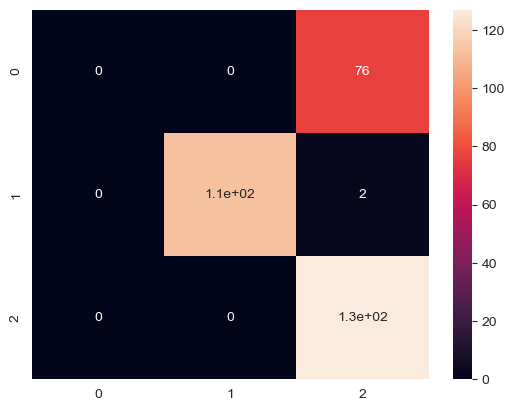

In [56]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

# Classification Report

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        76
         low       1.00      0.98      0.99       115
      medium       0.62      1.00      0.77       127

    accuracy                           0.75       318
   macro avg       0.54      0.66      0.59       318
weighted avg       0.61      0.75      0.66       318



# Visualization of Decision Tree


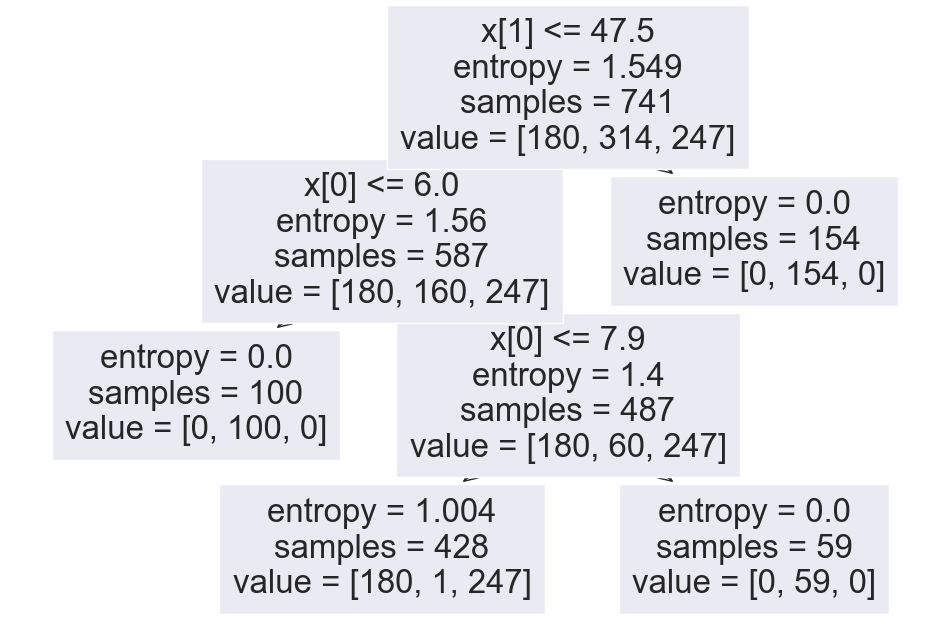

In [58]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(dtc.fit(X_train,y_train))
plt.show()